# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/14foGOXO-ed17UdnUoPNDwd4aDGuSd94r?usp=sharing)

https://wikidocs.net/24987

1. 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)

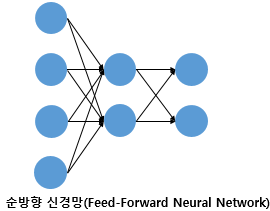

위 그림의 다층 퍼셉트론(MLP)과 같이 오직 입력층에서 출력층 방향으로 연산이 전개되는 신경망을 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)이라고 합니다.

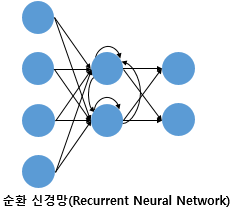

위의 그림은 FFNN에 속하지 않는 RNN이라는 신경망을 보여줍니다. 이 신경망은 은닉층의 출력값을 출력층으로도 값을 보내지만, 동시에 은닉층의 출력값이 다시 은닉층의 입력으로 사용됩니다.

2. 전결합층(Fully-connected layer, FC, Dense layer)

다층 퍼셉트론은 은닉층과 출력층에 있는 모든 뉴런은 바로 이전 층의 모든 뉴런과 연결돼 있었습니다. 그와 같이 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결돼 있는 층을 전결합층(Fully-connected layer) 또는 완전연결층이라고 합니다. 줄여서 FC라고 부르기도 합니다. 앞서 본 다층 퍼셉트론의 모든 은닉층과 출력층은 전결합층입니다. 동일한 의미로 밀집층(Dense layer) 이라고 부르기도 하는데, 케라스에서는 밀집층을 구현할 때 Dense()를 사용합니다.

3. 활성화 함수(Activation Function)

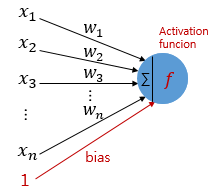

앞서 배운 퍼셉트론에서는 계단 함수(Step function)를 통해 출력값이 0이 될지, 1이 될지를 결정했습니다. 이러한 매커니즘은 실제 뇌를 구성하는 신경 세포 뉴런이 전위가 일정치 이상이 되면 시냅스가 서로 화학적으로 연결되는 모습을 모방한 것입니다. 이렇게 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수를 활성화 함수(Activation function)라고 하는데 계단 함수는 이러한 활성화 함수의 하나의 예제에 불과합니다.

다양한 활성화 함수에 대해서 정리해봅시다. 일부는 머신 러닝 챕터에서 이미 봤던 함수들입니다.

(1) 활성화 함수의 특징 - 비선형 함수(Nonlinear function)

활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야 한다는 점입니다. 선형 함수란 출력이 입력의 상수배만큼 변하는 함수를 선형함수라고 합니다. 예를 들어 f(x) = wx + b
라는 함수가 있을 때, w
와 b
는 상수입니다. 이 식을 그래프로 시각화하면 직선입니다. 반대로 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말합니다.

인공 신경망에서 활성화 함수는 비선형 함수여야 합니다. 앞서 퍼셉트론에서도 계단 함수라는 활성화 함수를 사용했는데 계단 함수 또한 비선형 함수에 속합니다. 인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 합니다. 그런데 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없습니다. 예를 들어 활성화 함수로 선형 함수를 선택하고, 층을 계속 쌓는다고 가정해보겠습니다. 활성화 함수는 f(x) = wx
라고 가정합니다. 여기다가 은닉층을 두 개 추가한다고하면 출력층을 포함해서 y(x) = f(f(f(x)))
가 됩니다. 이를 식으로 표현하면 w * w * w * x  
입니다. 그런데 이는 잘 생각해보면 y(x) = kx
의 세 제곱값을
라고 정의해버리면
와 같이 다시 표현이 가능합니다. 이 경우, 선형 함수로 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이가 없음을 알 수 있습니다.

활성화 함수가 존재하지 않는 선형 함수 층을 사용하지 않는다는 의미는 아닙니다. 종종 활성화 함수를 사용하지 않는 층을 비선형 층들과 함께 인공 신경망의 일부로서 추가하는 경우도 있는데, 학습 가능한 가중치가 새로 생긴다는 점에서 의미가 있습니다. 이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서 이 책에서는 선형층(linear layer)이나 투사층(projection layer) 등의 다른 표현을 사용하여 표현합니다. 뒤의 챕터에서 언급할 임베딩 층(embedding layer)도 일종의 선형층입니다. 임베딩 층에는 활성화 함수가 존재하지 않습니다. 활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)입니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(2) 계단 함수(Step function)

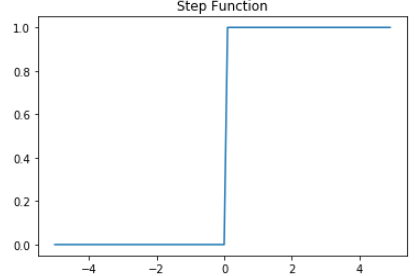

<ipython-input-2-7948846db825>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype = np.int)


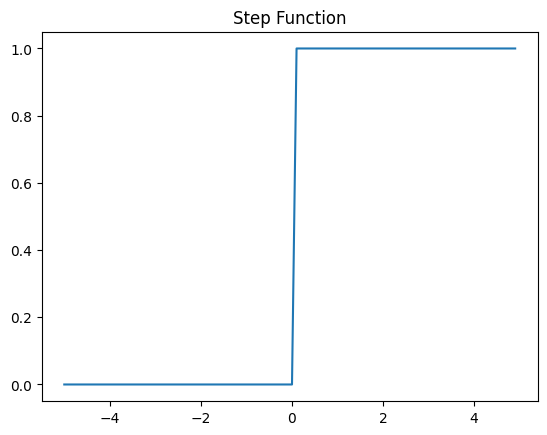

In [2]:
def step(x):
    return np.array(x > 0, dtype = np.int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x, y)
plt.show()

계단 함수는 거의 사용되지 않지만 퍼셉트론을 통해 인공 신경망을 처음 배울 때 접하게 되는 활성화 함수입니다

(3) 시그모이드 함수(Sigmoid function)와 기울기 소실

시그모이드 함수를 사용한 인공 신경망이 있다고 가정해보겠습니다.

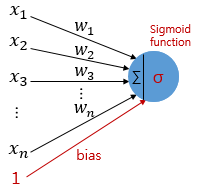

위 인공 신경망의 학습 과정은 다음과 같습니다. 우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고, 그리고 이 손실(오차라고도 부릅니다. loss)을 미분을 통해서 기울기(gradient)를 구하고, 이를 통해 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정인 역전파(back propagation)를 수행합니다. 역전파에 대해서는 뒤에서 더 자세히 설명하겠지만 일단 여기에서는 인공 신경망에서 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정이라고만 언급해두겠습니다. 역전파 과정에서 인공 신경망은 경사 하강법을 사용합니다.

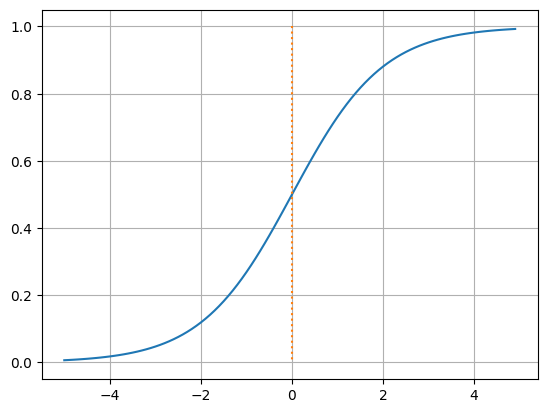

In [3]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':') #가운데 점선 추가
plt.grid()
plt.show()

위 그래프는 시그모이드 함수의 그래프를 보여줍니다. 시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 볼 수 있습니다. 기울기가 완만해지는 구간을 주황색, 그렇지 않은 구간을 초록색으로 칠해보겠습니다.



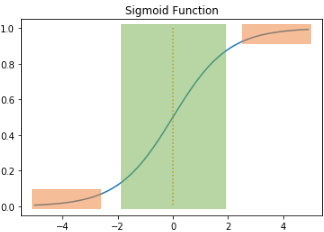

주황색 구간에서는 미분값이 0에 가까운 아주 작은 값입니다. 초록색 구간에서의 미분값은 최대값이 0.25입니다. 다시 말해 시그모이드 함수를 미분한 값은 적어도 0.25 이하의 값입니다. 시그모이드 함수를 활성화 함수로하는 인공 신경망의 층을 쌓는다면, 가중치와 편향을 업데이트 하는 과정인 역전파 과정에서 0에 가까운 값이 누적해서 곱해지게 되면서, 앞단에는 기울기(미분값)가 잘 전달되지 않게 됩니다. 이러한 현상을 기울기 소실(Vanishing Gradient) 문제라고 합니다.

시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 됩니다. 다시 말해 매개변수 w
가 업데이트 되지 않아 학습이 되지를 않습니다.

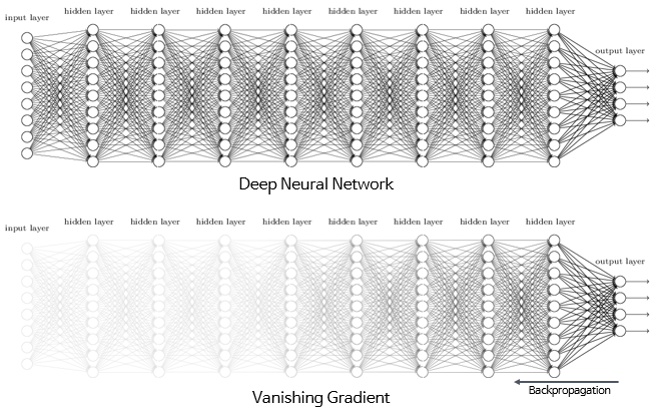

위의 그림은 은닉층이 깊은 신경망에서 기울기 소실 문제로 인해 출력층과 가까운 은닉층에서는 기울기가 잘 전파되지만, 앞단으로 갈수록 기울기가 제대로 전파되지 않는 모습을 보여줍니다. 결론적으로 시그모이드 함수의 은닉층에서의 사용은 지양됩니다. 시그모이드 함수는 주로 이진 분류를 위해 출력층에서 사용합니다.

(4) 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환합니다. 그래프를 그려보겠습니다.

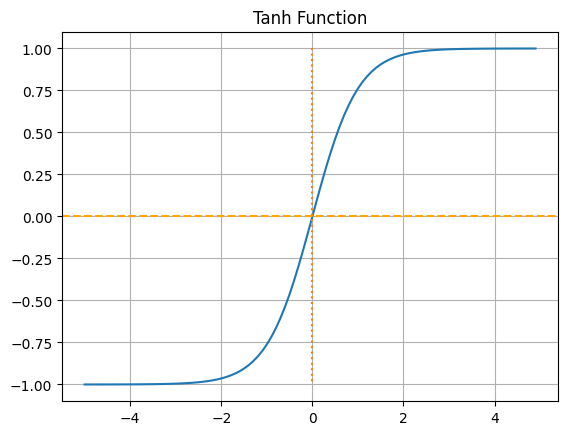

In [4]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0], [1.0, -1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.grid()
plt.show()

하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제가 발생합니다. 그러나 하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고있으며 하이퍼볼릭탄젠트 함수를 미분했을 때의 최대값은 1로 시그모이드 함수의 최대값인 0.25보다는 큽니다. 다시 말해 미분했을 때 시그모이드 함수보다는 전반적으로 큰 값이 나오게 됩니다. 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은 편이며 은닉층에서 시그모이드 함수보다는 선호됩니다.

(5) 렐루 함수(ReLU)

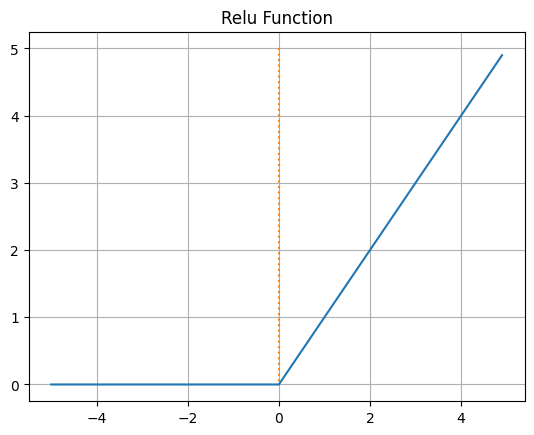

In [6]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Relu Function')
plt.grid()
plt.show()

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환하는 것이 특징인 함수로 출력값이 특정 양수값에 수렴하지 않습니다. 0이상의 입력값의 경우에는 미분값이 항상 1입니다. 깊은 신경망의 은닉층에서 시그모이드 함수보다 훨씬 더 잘 작동합니다. 뿐만 아니라, 렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠릅니다.

하지만 여전히 문제점이 존재하는데, 입력값이 음수면 기울기. 즉, 미분값도 0이 됩니다. 그리고 이 뉴런은 다시 회생하는 것이 매우 어렵습니다. 이 문제를 죽은 렐루(dying ReLU)라고 합니다

(6) 리키 렐루(Leaky ReLU)

죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했습니다. 변형 함수는 여러 개가 있지만 여기서는 Leaky ReLU에 대해서만 소개합니다. Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있습니다. 수식은 f(x) = max(ax, x)
로 아주 간단합니다. a는 하이퍼파라미터로 Leaky('새는') 정도를 결정하며 일반적으로는 0.01의 값을 가집니다. 여기서 말하는 '새는 정도'라는 것은 입력값의 음수일 때의 기울기를 비유하고 있습니다.

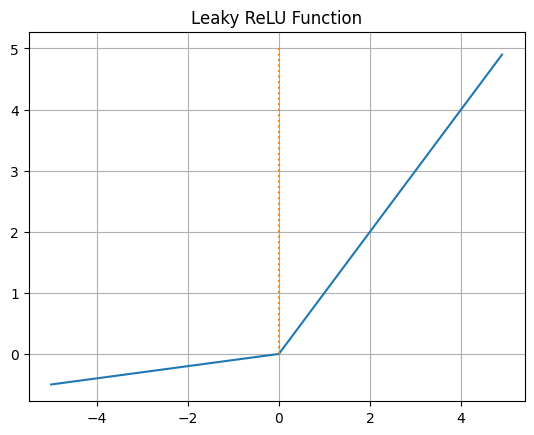

In [7]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Leaky ReLU Function')
plt.grid()
plt.show()

위의 그래프에서는 새는 모습을 확실히 보여주기 위해 a를 0.1로 잡았습니다. 위와 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않습니다.

(7) 소프트맥스 함수(Softmax function)

은닉층에서는 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적입니다. 반면, 소프트맥스 함수는 시그모이드 함수처럼 출력층에서 주로 사용됩니다. 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 소프트맥스 함수는 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용됩니다. 다시 말해서 딥 러닝으로 이진 분류를 할 때는 출력층에 앞서 배운 로지스틱 회귀를 사용하고, 딥 러닝으로 다중 클래스 분류 문제를 풀 때는 출력층에 소프트맥스 회귀를 사용한다고 생각할 수 있습니다.

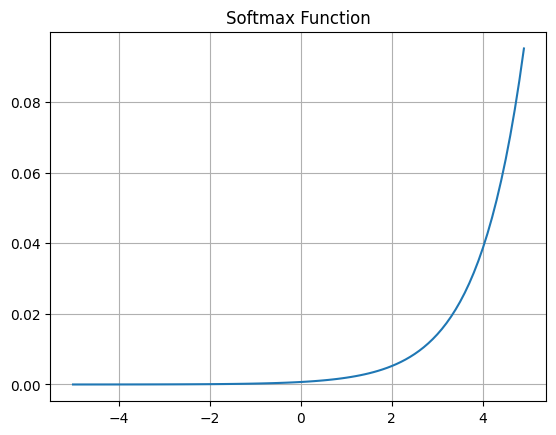

In [8]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.grid()
plt.show()